In [1]:
from greenlearning.utils import DataProcessor
from greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
data = DataProcessor("greenlearning/data/examples/datasets/airy_equation-5.mat")
data.generateDataset(valRatio = 0.95, batch_size = 128)

Metal device set to: Apple M1 Pro


In [3]:
model = Model(activation = 'rational')

In [4]:
lossHistory = model.train(data, epochs = 3000)

Loss at epoch 99: Training = 3.293E-01, Validation = 4.252E-01
Loss at epoch 199: Training = 3.863E-02, Validation = 3.696E-02
Loss at epoch 299: Training = 1.081E-02, Validation = 1.067E-02
Loss at epoch 399: Training = 5.250E-03, Validation = 5.013E-03
Loss at epoch 499: Training = 3.207E-03, Validation = 3.272E-03
Loss at epoch 599: Training = 2.470E-03, Validation = 3.344E-03
Loss at epoch 699: Training = 1.851E-03, Validation = 2.402E-03
Loss at epoch 799: Training = 1.671E-03, Validation = 2.425E-03
Loss at epoch 899: Training = 1.329E-03, Validation = 1.955E-03
Loss at epoch 999: Training = 1.127E-03, Validation = 1.709E-03
Loss at epoch 1099: Training = 1.035E-03, Validation = 1.586E-03
Loss at epoch 1199: Training = 1.006E-03, Validation = 1.522E-03
Loss at epoch 1299: Training = 8.164E-04, Validation = 1.273E-03
Loss at epoch 1399: Training = 7.577E-03, Validation = 2.038E-02
Loss at epoch 1499: Training = 6.821E-04, Validation = 1.090E-03
Loss at epoch 1599: Training = 6.088

In [5]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

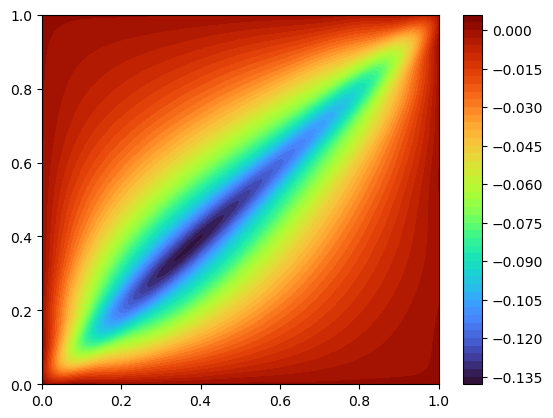

In [6]:
plt.figure()
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

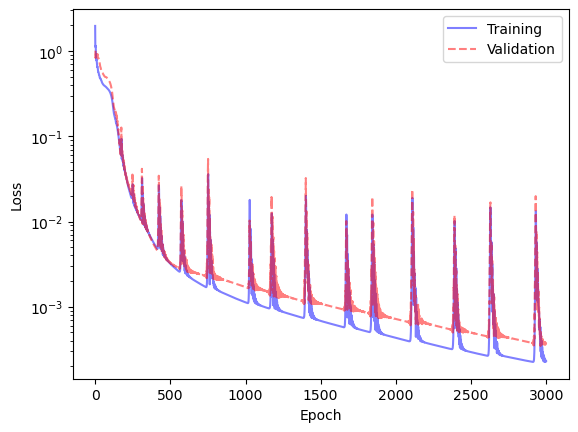

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [8]:
model.saveModels()

INFO:tensorflow:Assets written to: savedmodel/G/assets
INFO:tensorflow:Assets written to: savedmodel/N/assets
